# ACTIVIDAD 1 - BÚSQUEDA (Algoritmos DFS, BFS, Greedy, A*)

Librerías que utilizaremos para realizar la actividad:

In [98]:
!pip install osmnx
!pip install networkx


In [119]:
import osmnx as ox
import random
import heapq
import collections
import networkx as nx
import math

## Carga del mapa y estilos
Aquí deberán cargar el mapa en la ubicación que deseen, con la funcion ```python ox.graph_from_place``` obtendremos un grafo dirigido con la información del mapa, incluidos sus nodos y aristas (calles que unen los nodos)

In [100]:
lugar = "San Martin, Mendoza ,Argentina" # Ej: "Godoy Cruz, Mendoza, Argentina"
G = ox.graph_from_place(lugar, network_type="drive")

Funciones para dar estilo al mapa, pueden modificar colores y tamaños de los elementos, o ignorar esta celda si no desean modificar el estilo del mapa.

In [101]:
def arista_no_visitada(edge):
    G.edges[edge]["color"] = "#22609b"
    G.edges[edge]["alpha"] = 0.2
    G.edges[edge]["linewidth"] = 0.5

def arista_visitada(edge):
    G.edges[edge]["color"] = "#22609b"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def arista_activa(edge):
    G.edges[edge]["color"] = 'lightblue'
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def arista_solucion(edge):
    G.edges[edge]["color"] = "white"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

Función que modifica el gráfico para aplicar los estilos que vayamos dando a cada nodo o arista

In [102]:
def plot_graph():
    ox.plot_graph(
        G,
        node_size =  [ G.nodes[node]["size"] for node in G.nodes ],
        edge_color = [ G.edges[edge]["color"] for edge in G.edges ],
        edge_alpha = [ G.edges[edge]["alpha"] for edge in G.edges ],
        edge_linewidth = [ G.edges[edge]["linewidth"] for edge in G.edges ],
        node_color = "white",
        bgcolor = "#001028"
    )

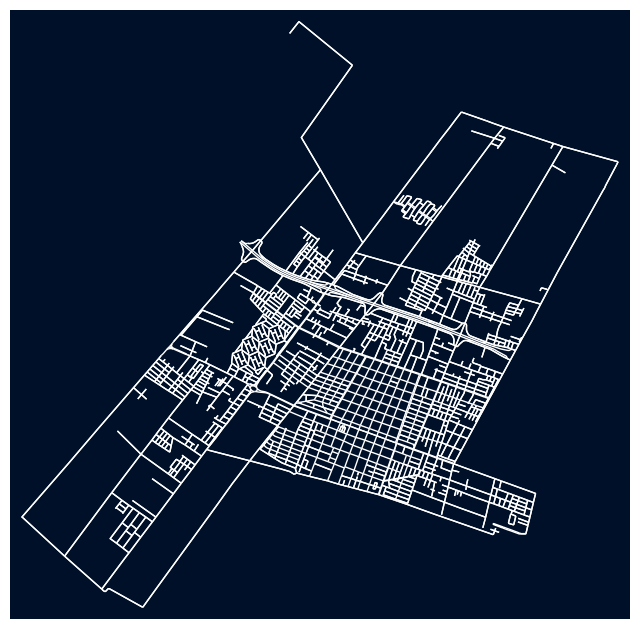

In [103]:
for node in G.nodes:
    G.nodes[node]["size"] = 0

for edge in G.edges:
    arista_solucion(edge)

plot_graph()

## Implementación de los algoritmos
En todos los casos, las funciones recibirán el grafo G, el nodo de inicio y el nodo de la meta

### Búsqueda no informada

In [104]:
def dfs(G, inicio, meta):
    # Implementar el algoritmo Depth-First Search
    # Pista: utilizar los 5 pasos que vimos en clase para ir explorando los nodos
    # 1) Dar estilo a nodos y aristas (estilos iniciales)
    # 2) Los nodos presentan son diccionarios con las siguientes claves:
    #   - "y": coordenadas y del nodo
    #   - "x": coordenadas x del nodo
    #   - "street_count": numero de calles que salen del nodo
    # 3) Para dar los estilos iniciales, todos los nodos deberian tener un size de 0, a menos que sean el inicio o la meta,
    # en ese caso dar un poco mas de tamaño para que sean visibles en el mapa
    # 4) Todos los nodos deberán tener un nodo "padre" (para el incio, el padre es None)
    # 5) Inicializar la frontera con el nodo inicial dentro
    # 6) Inicializar lista de nodos explorados
    # 7) Bucle principal (revisar teoria)

    for node in G.nodes:
        G.nodes[node]["size"] = 0
        G.nodes[node]["padre"] = None
    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30

    for edge in G.edges:
        arista_no_visitada(edge)

    frontera = [inicio]

    explorados = []

    while True:
        if len(frontera) == 0:
            print("La frontera está vacía, no hay solución")
            break

        nodo_actual = frontera.pop()

        if nodo_actual == meta:
            print("Meta alcanzada")
            solucion = []
            while nodo_actual is not None:  # nodo_actual es la meta, es el ultimo nodo
                solucion.append(G.nodes[nodo_actual]["padre"])
                nodo_actual = G.nodes[nodo_actual]["padre"]
            solucion.pop()
            solucion.reverse()
            return solucion, explorados
        #     #calle 1                       # calle 2                 #calle3
        # [(1876154175, 1876154081), (1876154175, 1876154219), (1876154175, 1876154201)]
        for arista in G.out_edges(nodo_actual): # (nodo_actual, vecino)
            arista_visitada((arista[0], arista[1], 0))  #G.edges[arista] --> G.edges[(nodo_actual, vecino, 0)]
            vecino = arista[1]
            if vecino not in explorados and vecino not in frontera:
                G.nodes[vecino]["padre"] = nodo_actual
                frontera.append(vecino)
                arista_activa((arista[0], arista[1], 0))

        explorados.append(nodo_actual)

In [118]:

def bfs(G, inicio, meta):
  """
  Implementa el algoritmo Breadth-First Search (BFS)

  Parámetros:
    G: Grafo representado como un objeto NetworkX
    inicio: Nodo inicial
    meta: Nodo objetivo

  Retorno:
    solucion: Lista de nodos que forman la ruta desde el inicio hasta la meta
    explorados: Lista de nodos explorados durante la búsqueda
  """

  # 1) Dar estilo a nodos y aristas (estilos iniciales)
  for node in G.nodes:
    G.nodes[node]["size"] = 0
  G.nodes[inicio]["size"] = 30
  G.nodes[meta]["size"] = 30

  for edge in G.edges:
    arista_no_visitada(edge)

  # 2) Inicializar la frontera con el nodo inicial dentro
  frontera = collections.deque([inicio])

  # 3) Inicializar lista de nodos explorados
  explorados = []

  while True:
    # 4) Si la frontera está vacía, no hay solución
    if not frontera:
      print("La frontera está vacía, no hay solución")
      return [], explorados

    # 5) Extraer el nodo actual de la frontera
    nodo_actual = frontera.popleft()

    # 6) Si se ha encontrado la meta, reconstruir la solución
    if nodo_actual == meta:
      print("Meta alcanzada")
      solucion = []
      while nodo_actual is not None:
        solucion.append(G.nodes[nodo_actual]["padre"])
        nodo_actual = G.nodes[nodo_actual]["padre"]
      solucion.pop()
      solucion.reverse()
      return solucion, explorados

    # 7) Marcar el nodo actual como explorado
    explorados.append(nodo_actual)

    # 8) Explorar los vecinos del nodo actual
    for arista in G.out_edges(nodo_actual):
      arista_visitada((arista[0], arista[1], 0))
      vecino = arista[1]
      if vecino not in explorados and vecino not in frontera:
        G.nodes[vecino]["padre"] = nodo_actual
        frontera.append(vecino)
        arista_activa((arista[0], arista[1], 0))



### Búsqueda informada

In [106]:
def heuristica(nodo_1, nodo_2):
    # Obtener las coordenadas de los nodos
    x1, y1 = G.nodes[nodo_1]["x"], G.nodes[nodo_1]["y"]
    x2, y2 = G.nodes[nodo_2]["x"], G.nodes[nodo_2]["y"]

    # Calcular la distancia euclidiana
    distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    return distancia



In [107]:
def greedy(G, inicio, meta, h):
    for node in G.nodes:
        G.nodes[node]["size"] = 0
        G.nodes[node]["padre"] = None
    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30

    for edge in G.edges:
        arista_no_visitada(edge)

    frontera = [(h(inicio, meta), inicio)]
    explorados = []

    while frontera:
        _, nodo_actual = heapq.heappop(frontera)

        if nodo_actual == meta:
            solucion = []
            while nodo_actual is not None:
                solucion.append(nodo_actual)
                nodo_actual = G.nodes[nodo_actual]["padre"]
            solucion.reverse()
            return solucion, explorados

        for arista in G.out_edges(nodo_actual):
            arista_visitada((arista[0], arista[1], 0))
            vecino = arista[1]
            if vecino not in explorados:
                G.nodes[vecino]["padre"] = nodo_actual
                heapq.heappush(frontera, (h(vecino, meta), vecino))
                arista_activa((arista[0], arista[1], 0))

        explorados.append(nodo_actual)


In [108]:
def a_star(G, inicio, meta, h):
    for node in G.nodes:
        G.nodes[node]["size"] = 0
        G.nodes[node]["padre"] = None
        G.nodes[node]["g"] = float('inf')  # Costo desde el inicio hasta el nodo actual
    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30
    G.nodes[inicio]["g"] = 0

    for edge in G.edges:
        arista_no_visitada(edge)

    frontera = [(h(inicio, meta), inicio)]  # La frontera es una cola de prioridad
    explorados = []

    while frontera:
        _, nodo_actual = heapq.heappop(frontera)

        if nodo_actual == meta:
            solucion = []
            while nodo_actual is not None:
                solucion.append(nodo_actual)
                nodo_actual = G.nodes[nodo_actual]["padre"]
            solucion.reverse()
            return solucion, explorados

        for arista in G.out_edges(nodo_actual):
            arista_visitada((arista[0], arista[1], 0))
            vecino = arista[1]
            if vecino not in explorados:
                g_temp = G.nodes[nodo_actual]["g"] + 1  # Asumimos un peso de 1 para todas las aristas
                if g_temp < G.nodes[vecino]["g"]:
                    G.nodes[vecino]["padre"] = nodo_actual
                    G.nodes[vecino]["g"] = g_temp
                    f = g_temp + h(vecino, meta)
                    heapq.heappush(frontera, (f, vecino))
                    arista_activa((arista[0], arista[1], 0))

        explorados.append(nodo_actual)

## Ejecución y análisis


Seleccionamos dos nodos del grafo al azar utilizando random:

In [109]:
def dibujar_solucion(inicio, meta):
    for arista in G.edges:
        arista_no_visitada(arista)    # out_edges -> (nodo_origen, nodo_destino)

    nodo_actual = meta
    distancia = 0

    while nodo_actual != inicio:
        G.nodes[nodo_actual]["size"] = 0
        padre = G.nodes[nodo_actual]["padre"]
        arista_solucion((padre, nodo_actual, 0))                     # (nodo_origen, nodo_destino, 0)
        distancia += G.edges[(padre, nodo_actual, 0)]["length"]
        nodo_actual = padre
    print(f"Distancia recorrida: {distancia/1000}")

    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30

    plot_graph()

In [110]:
inicio = random.choice(list(G.nodes))
print(f"Inicio: {inicio}")
meta = random.choice(list(G.nodes))
print(f"Meta: {meta}")

Inicio: 2667926666
Meta: 1849768991


In [111]:
print(G.out_edges(inicio))

[(2667926666, 2667926636)]


*Pueden utilizar la funcion nearest_nodes para obtener los nodos más cercanos a un punto en el mapa

Meta alcanzada
Nodos incluidos en la solucion: 225
Nodos explorados: 1129


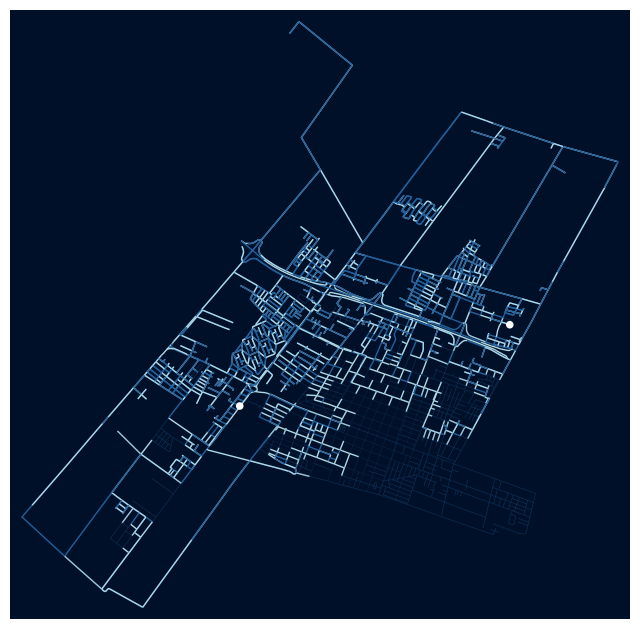

In [112]:
solucion, explorados = dfs(G, inicio, meta)
print(f"Nodos incluidos en la solucion: {len(solucion)}")
print(f"Nodos explorados: {len(explorados)}")

plot_graph()

Meta alcanzada
Nodos incluidos en la solucion: 36
Nodos explorados: 1626


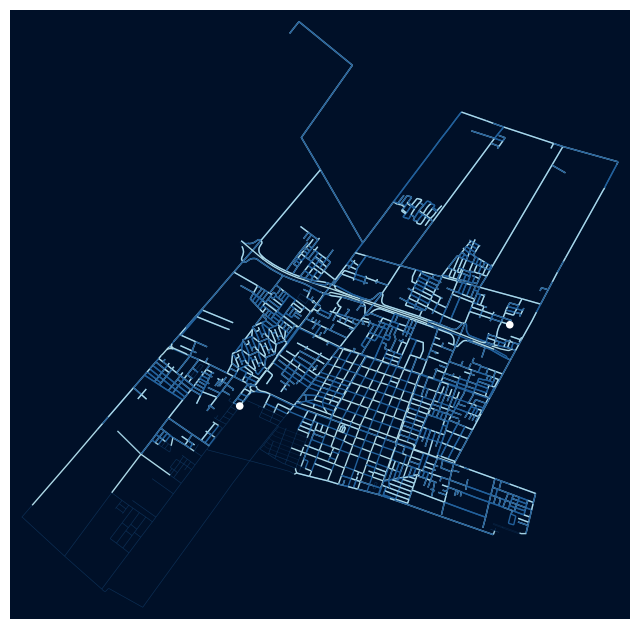

In [113]:
solucion, explorados = bfs(G, inicio, meta)
print(f"Nodos incluidos en la solucion: {len(solucion)}")
print(f"Nodos explorados: {len(explorados)}")

plot_graph()

Nodos incluidos en la solución: 57
Nodos explorados: 58


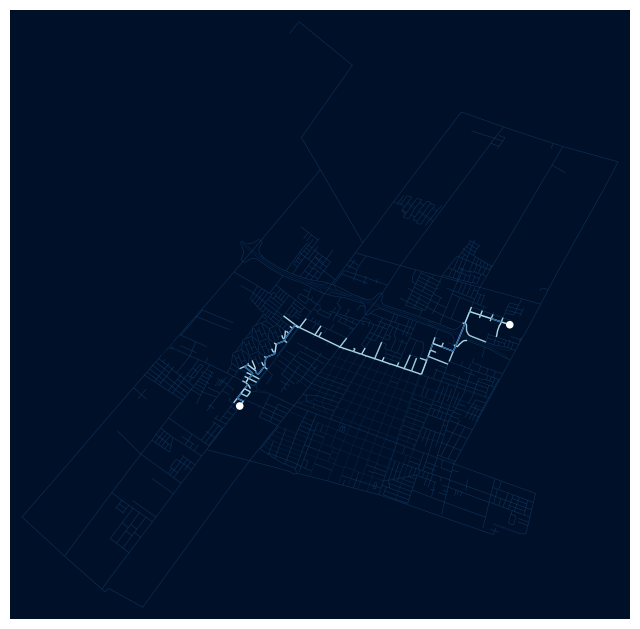

In [116]:

solucion, explorados = greedy(G, inicio, meta, heuristica)


print(f"Nodos incluidos en la solución: {len(solucion)}")
print(f"Nodos explorados: {len(explorados)}")

plot_graph()

Nodos incluidos en la solución: 37
Nodos explorados: 1610


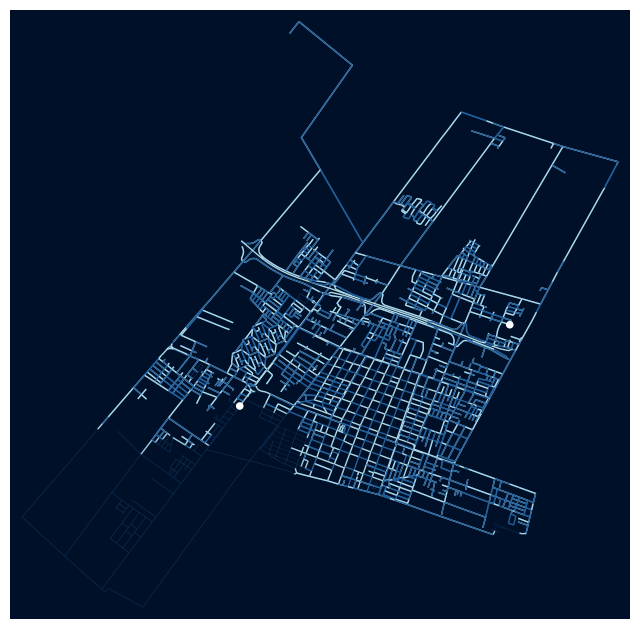

In [117]:

solucion, explorados = a_star(G, inicio, meta, heuristica)


print(f"Nodos incluidos en la solución: {len(solucion)}")
print(f"Nodos explorados: {len(explorados)}")

plot_graph()

In [ ]:
# Ejecutar cada algoritmo acompañado de la grafica correspondiente
# deberán crear una función que de estilos a las aristas que unen los nodos de la solución